In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
# import dataset
# columns = ['v1', 'v2', 'drop1', 'drop2', 'drop3']
df = pd.read_csv(r'Sources\spam.csv', encoding='latin-1') #new
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [3]:
df.drop(columns = ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 2'], inplace=True)
print(df.head(5))

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
# renaming the columns
df.rename(columns={'v1':'target', 'v2':'sms'}, inplace=True)
print(df.head(5))

  target                                                sms
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
# lable encoding the df to get 0 or 1 for target values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
print(df.head(5))

   target                                                sms
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [6]:
# analysing the dataset for the null values
print(df.isnull().sum())

target    0
sms       0
dtype: int64


In [7]:
# analysing the dataset for the duplicate values
print(df.duplicated().sum())
# removing duplicates
df.drop_duplicates(keep='first', inplace=True)
print(df.duplicated().sum())

403
0


In [8]:
# performing EDA (Exploratory Data Analyis), to better understand our dataset.

#1 counting number of words, character, and sentences
import nltk
# nltk.download('punkt')

In [9]:
df['num_chars'] = df.sms.apply(len)
df['num_words'] = df.sms.apply(lambda x: len(nltk.word_tokenize(x))) # new
df['num_sents'] = df.sms.apply(lambda x: len(nltk.sent_tokenize(x))) # new

In [10]:
print(df)
print(f"describing the newly added cols\n {df[['num_chars', 'num_words', 'num_sents']].describe()}")
print(f"describing the newly added cols for hams\n {df[df.target==0][['num_chars', 'num_words', 'num_sents']].describe()}") # new
print(f"describing the newly added cols for spams\n {df[df.target==1][['num_chars', 'num_words', 'num_sents']].describe()}") # new

      target                                                sms  num_chars  \
0          0  Go until jurong point, crazy.. Available only ...        111   
1          0                      Ok lar... Joking wif u oni...         29   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...        155   
3          0  U dun say so early hor... U c already then say...         49   
4          0  Nah I don't think he goes to usf, he lives aro...         61   
...      ...                                                ...        ...   
5567       1  This is the 2nd time we have tried 2 contact u...        161   
5568       0              Will Ì_ b going to esplanade fr home?         37   
5569       0  Pity, * was in mood for that. So...any other s...         57   
5570       0  The guy did some bitching but I acted like i'd...        125   
5571       0                         Rofl. Its true to its name         26   

      num_words  num_sents  
0            24          2  
1    

In [11]:
# analysing the stats with the help of graphs
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_chars', ylabel='Count'>

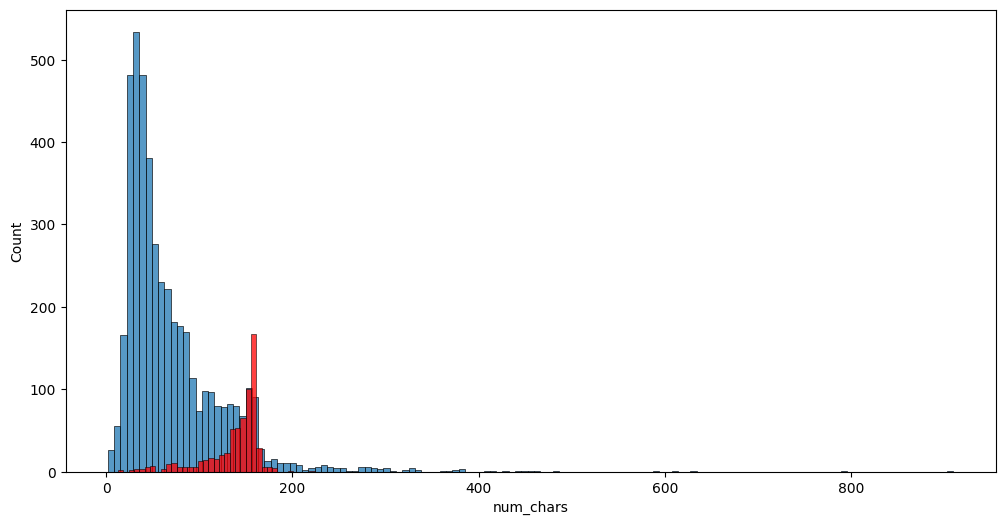

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target == 0]['num_chars']) # ham
sns.histplot(df[df.target == 1]['num_chars'], color='red') # spam

In [13]:
# observation: For spam messages number of characters used are more than number of characters used for ham

<Axes: xlabel='num_words', ylabel='Count'>

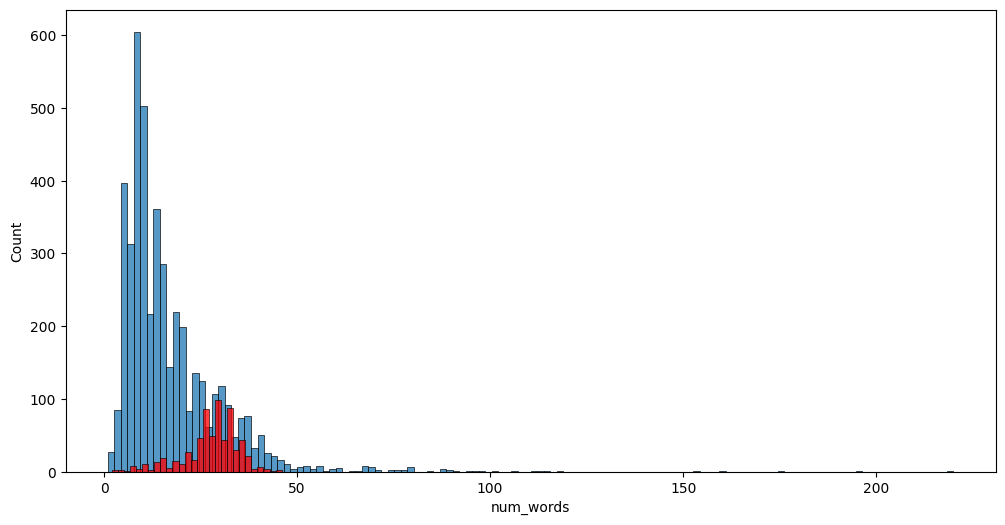

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target == 0]['num_words']) # ham
sns.histplot(df[df.target == 1]['num_words'], color='red') # spam

<Axes: xlabel='num_sents', ylabel='Count'>

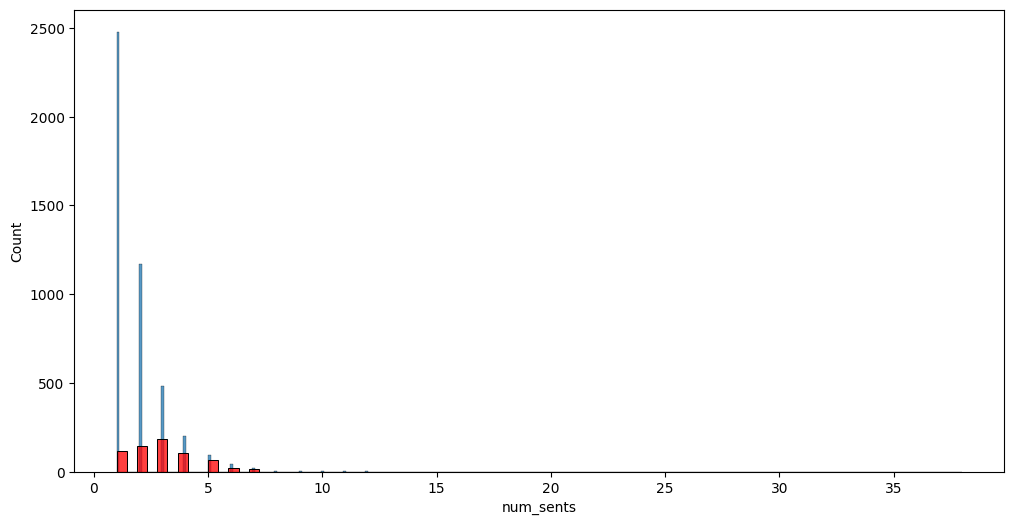

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target == 0]['num_sents']) # ham
sns.histplot(df[df.target == 1]['num_sents'], color='red') # spam

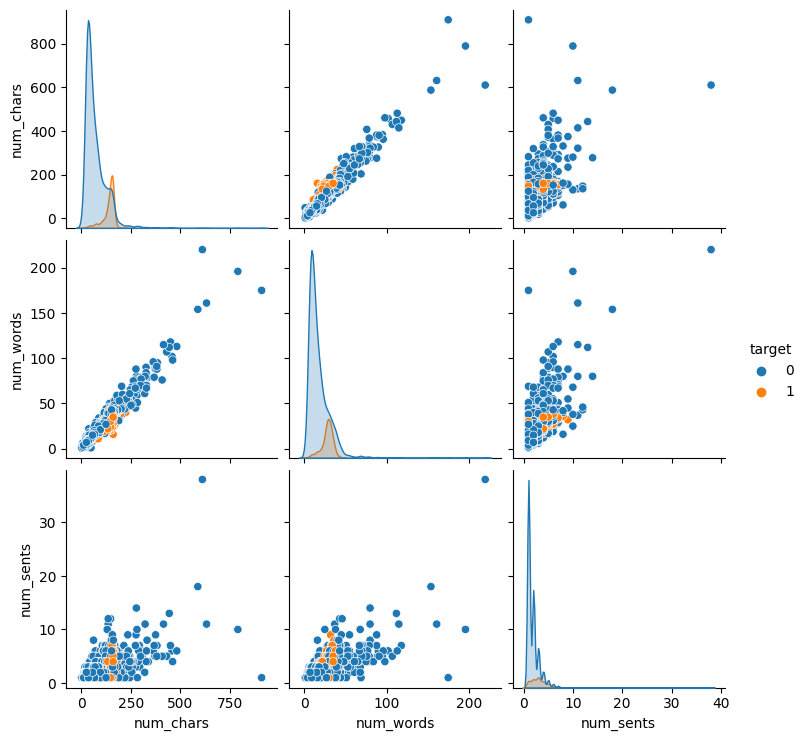

In [16]:
# checking relationship between num words and num chars
sns.pairplot(df, hue='target')

In [17]:
# observations: data has some outliers other than that it  looks linear relation i.e. if num_Chars directly propostional to 
# num_words which is directly proportional to num_sents.

In [18]:
# calculating correlation coefficient
df.corr() # new

C:\Users\AxelShivam\AppData\Local\Temp\ipykernel_4896\312147794.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # new


,target,num_chars,num_words,num_sents
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sents,0.263939,0.624139,0.679971,1.000000


C:\Users\AxelShivam\AppData\Local\Temp\ipykernel_4896\2294259535.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # new


<Axes: >

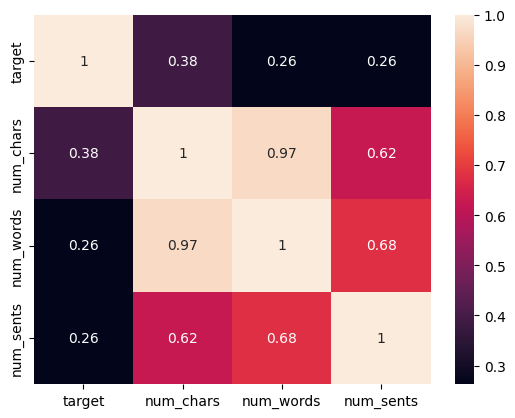

In [19]:
# using heat maps
sns.heatmap(df.corr(), annot=True) # new

In [20]:
# observation: we can see that there is co-relation among the values in df. But corelation among target and num_char is highest when compared to other counts.

In [21]:
## Analysis to see what are the most used words in spam messages.

In [22]:
import nltk

# Data Preprocessing (Text)
1. Lowercase
2. Tokenization
3. Removing special characters.
4. Removing Stopwards and punctuation
5. Stemming




In [23]:
with open ('Sources/stopwords.txt', 'r') as file:
    content = file.readlines()

content = [i.replace('\n', '') for i in content]

In [24]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    temp = []
    for i in text:
        if i.isalnum():
            temp.append(i)
    text = temp
    temp = []
    for i in text:
        if i not in content:
            temp.append(i)
            
    text = temp[:]
    temp.clear()
    for i in text:
        temp.append(ps.stem(i))
    return " ".join(temp)
            

In [27]:
import string
string.punctuation

'hi shivam road love'

In [29]:
# stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() 
ps.stem('dancing')

'danc'

In [32]:
text = 'hi how are you ! shivam roads loving'
transform_text(text)

'hi shivam road love'

In [44]:
df['transformed_text'] = df['sms'].apply(transform_text)

In [37]:
## creating word cloud to highlight import words

In [45]:
from wordcloud import WordCloud

In [51]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [52]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

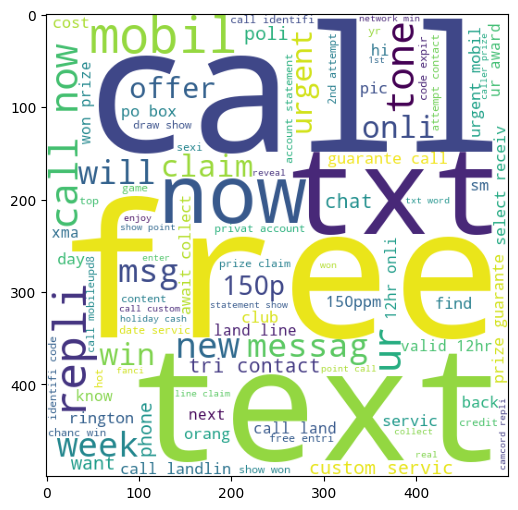

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [55]:
# doing the word cloud for ham

In [57]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

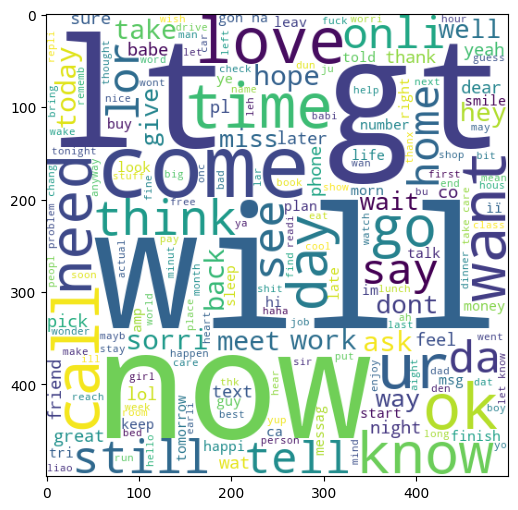

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [60]:
df.head()

,target,sms,num_chars,num_words,num_sents,transformed_texr,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazi onli bugi great world la bu...,jurong point crazi onli bugi great world la bu...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif oni,ok lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,dun say earli hor say,dun say earli hor say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live here,nah think goe usf live here


In [72]:
spam_corpus = []
for msg in df[df.target == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [73]:
len(spam_corpus)

9568

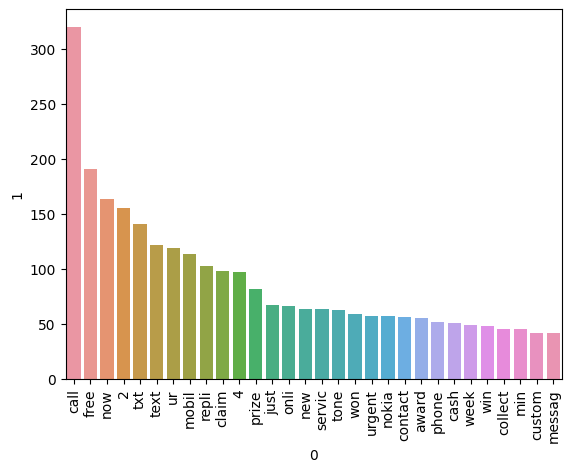

In [85]:
from collections import Counter
df_counter =  pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x = df_counter[0], y = df_counter[1])
plt.xticks(rotation='vertical')
plt.show()

In [86]:
# repeating same for ham

In [87]:
ham_corpus = []
for msg in df[df.target == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [88]:
len(ham_corpus)

31609

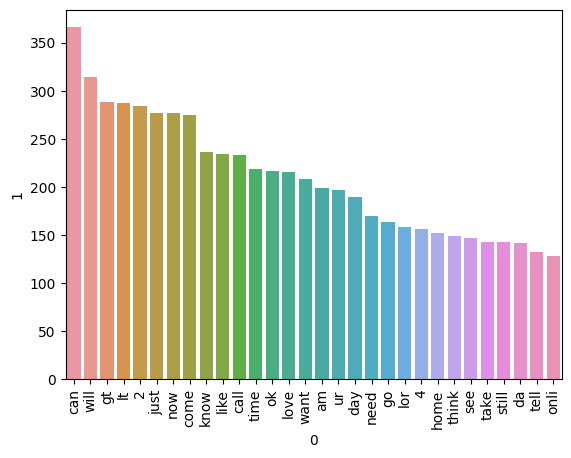

In [89]:
df_counter =  pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x = df_counter[0], y = df_counter[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building
## We'll use Naive Bayes model as it is assumed to best for textual data.
But naive bayes requires numerical inputs hence we need to change out data to vectors specially the transformed_text 

In [123]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [142]:
 # X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [133]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

## this reduces the precision scores

In [143]:
X.shape

(5169, 3000)

In [144]:
y = df['target'].values

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [146]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [147]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [148]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8626692456479691
[[779 117]
 [ 25 113]]
0.49130434782608695


In [149]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [150]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
